# **Insurance Cost Prediction**

-----------------------------
## **Context**
-----------------------------

Making an insurance cost prediction is essential for both individuals and insurance companies. For individuals, predicting insurance costs helps with financial planning, risk management, comparison shopping, and choosing the best insurance policy. It allows individuals to make informed decisions about how to allocate their resources and ensure they have sufficient funds to cover their insurance premiums. For insurance companies, predicting insurance costs helps with risk assessment, pricing, underwriting decisions, and customer retention. It allows insurance companies to accurately assess the risk of insuring an individual and set competitive prices that meet their customers' needs while still ensuring profitability. Overall, making an insurance cost prediction is crucial for both individuals and insurance companies to make informed decisions and effectively manage risks.

-----------------------------
## **Objective** 
-----------------------------

Based on the provided data, build a predictive model that can determine the medical insurance cost for a particular person.

-----------------------------
## **Dataset** 
-----------------------------

This data set was taken from: https://www.kaggle.com/mirichoi0218/insurance

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,

- objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance. This is the outcome variable to be predicted.



## **Importing the libraries and overview of the dataset**

In [1]:
# Importing libraries for data manipulation
import numpy as np

import pandas as pd

# Importing libraries for data visualization
import seaborn as sns

import matplotlib.pyplot as plt

# Importing libraries for building linear regression model
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

#Importing libraried for separate the train and test data set
from sklearn.model_selection import train_test_split

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Loading the datasets**

In [2]:
# Loading both train and test datasets

df = pd.read_csv('insurance.csv')


In [3]:
# Checking the first 5 rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### **Checking the info of the training data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Observations:**

- The dataset has **1338 observations and 7 columns**. 
- There are no missing values in the variables.
- We observe that the columns **sex**, **smoker** and **Region** have data type **object**, which means they are strings or categorical variables.
- The rest of the variables are all numerical.

### **Separating the train and test dataset from the initial one**

In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=25)

## **EDA and Data Preprocessing**

### **Univariate Analysis**

Let's start with analyzing the **categorical** variables present in the data

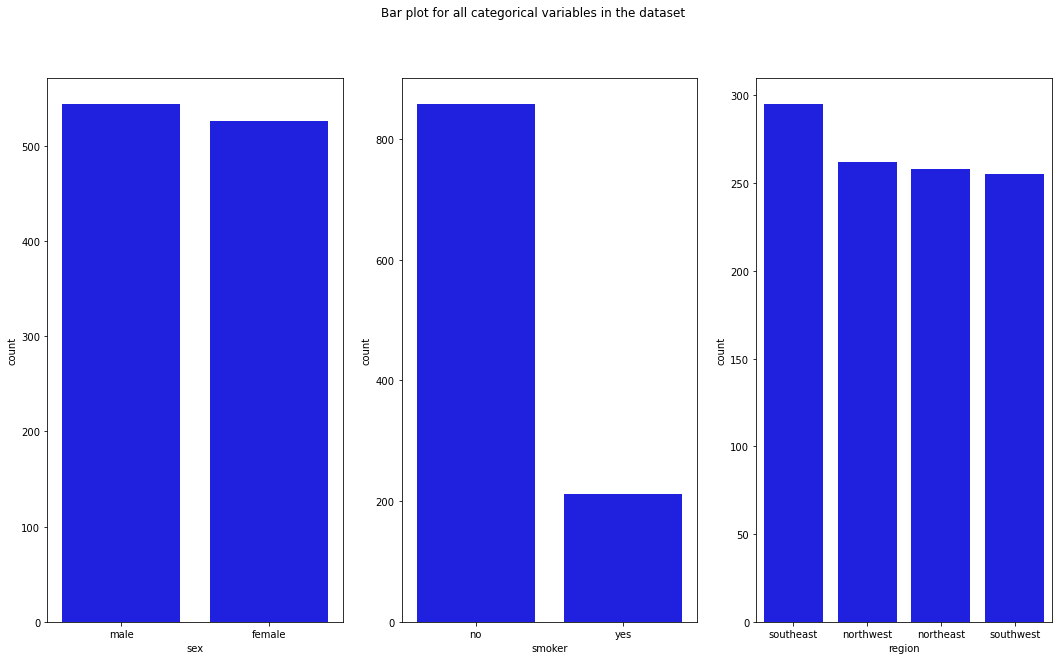

In [6]:
fig, axes = plt.subplots(1, 3, figsize = (18, 10))
  
fig.suptitle('Bar plot for all categorical variables in the dataset')

sns.countplot(ax = axes[0], x = 'sex', data = train_df, color = 'blue', 
              order = train_df['sex'].value_counts().index);

sns.countplot(ax = axes[1], x = 'smoker', data = train_df, color = 'blue', 
              order = train_df['smoker'].value_counts().index);

sns.countplot(ax = axes[2], x = 'region', data = train_df, color = 'blue', 
              order = train_df['region'].value_counts().index);



**Observations:**

- For the column **smoker**, we can see that the most common category is - **no**.
- The rest of the categories seems to be equilibrated.

Now, let's analyze all the **numerical** variables present in the data.

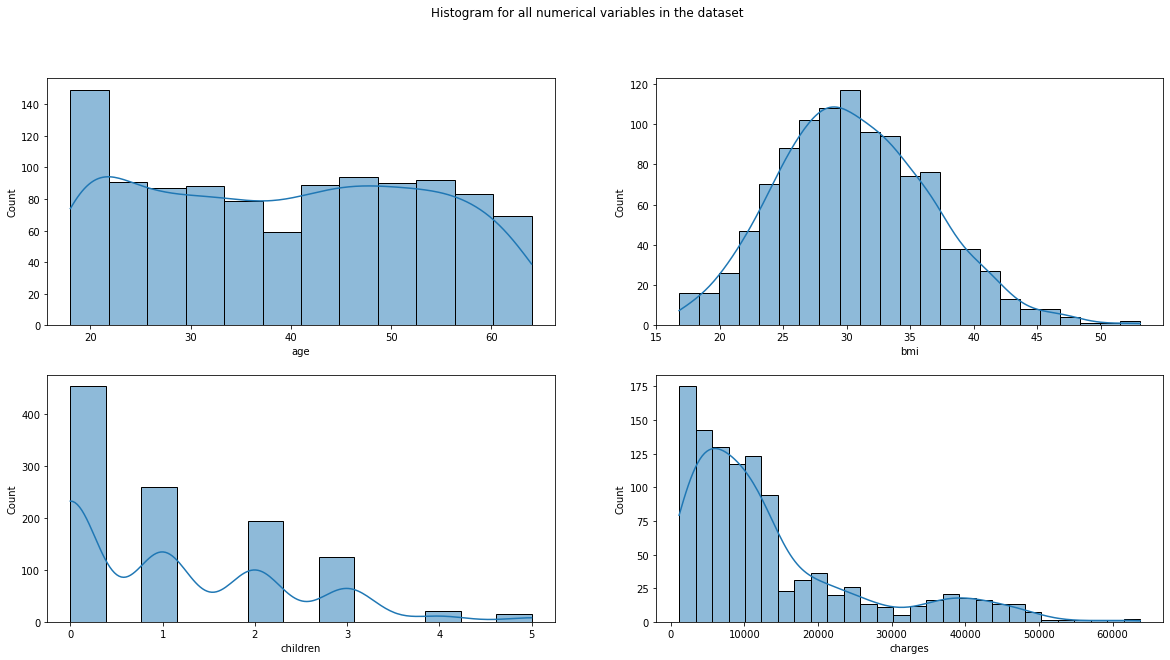

In [7]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))
  
fig.suptitle('Histogram for all numerical variables in the dataset')
  
sns.histplot(x = 'age', data = train_df, kde = True, ax = axes[0,0]);

sns.histplot(x = 'bmi', data = train_df, kde = True, ax = axes[0,1]);

sns.histplot(x = 'children', data = train_df, kde = True, ax = axes[1,0]);

sns.histplot(x = 'charges', data = train_df, kde = True, ax = axes[1,1]);

#### **Observations:**

- The variable **age** is approx uniformly distributed.
- The variable **chargres** is a right-skewed distribution.
- The variable **bmi** seems like a normal distribution.
- Most of the insured people (from the dataset) have no children.

### **Bivariate Analysis**

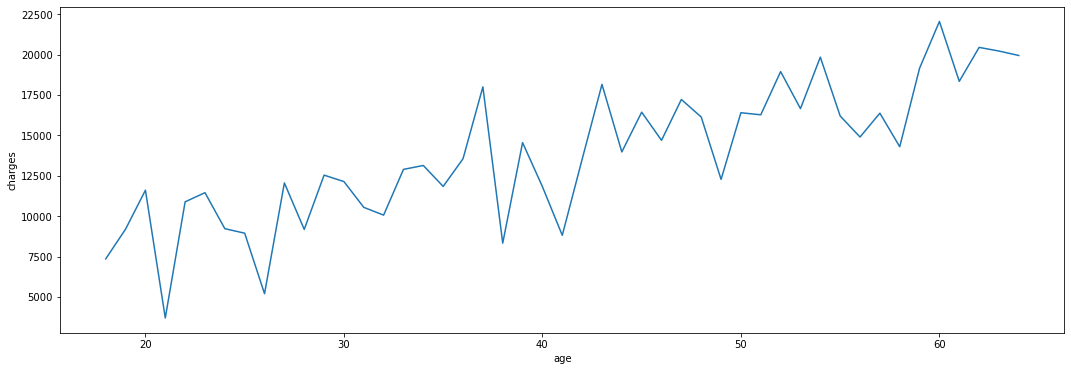

In [8]:
fig = plt.figure(figsize = (18, 6))
sns.lineplot(x = 'age', y = 'charges', data = train_df, ci = None, estimator = 'mean');

**Observations:**

- The charges on insurance tend to increase with age.

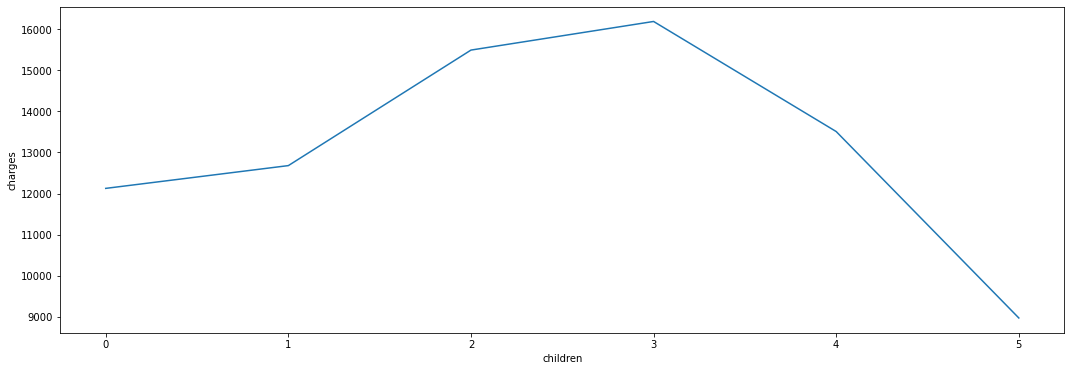

In [9]:
fig = plt.figure(figsize = (18, 6))
sns.lineplot(x = 'children', y = 'charges', data = train_df, ci = None, estimator = 'mean');

**Observations:**

- Insurance costs are higher for people with approximately 3 children.

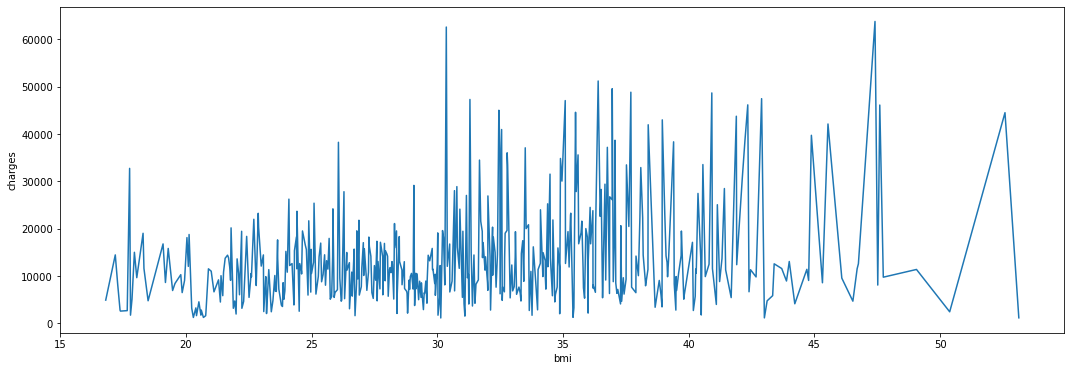

In [10]:
fig = plt.figure(figsize = (18, 6))
sns.lineplot(x = 'bmi', y = 'charges', data = train_df, ci = None, estimator = 'mean');

**Observations:**

- The charges on insurance tend to have more variance as the bmi rises.

Now, lets find out linear correlations between the variables. Also, we can find out **multi-collinearity**

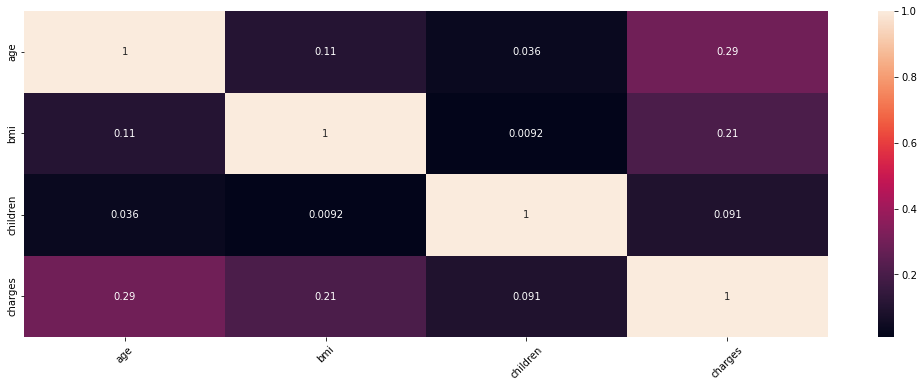

In [11]:
fig = plt.figure(figsize = (18, 6))

sns.heatmap(train_df.corr(), annot = True);

plt.xticks(rotation = 45);

**Observations:**

- It does not seem like there is any strong positive/negative correlation between the variables.

Next, let's create bivariate scatter plots to check relationships between the pair of independent and dependent variables.

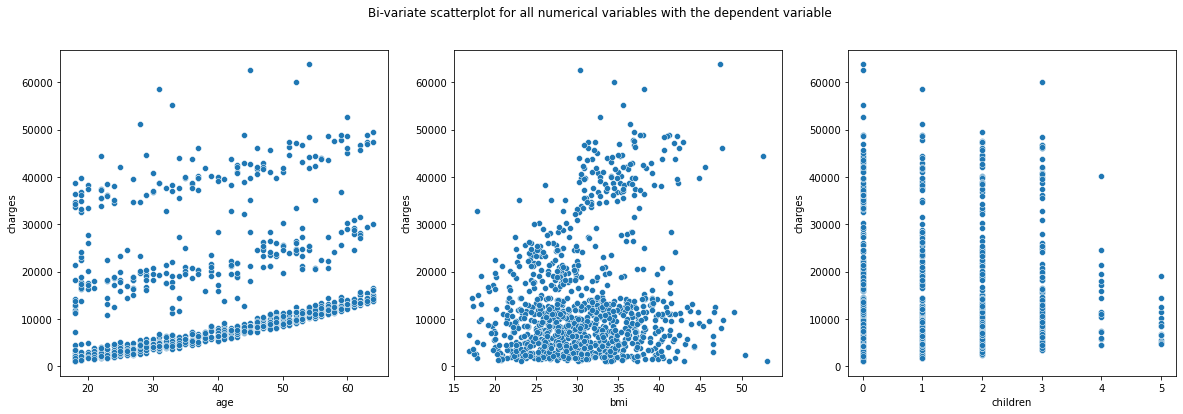

In [12]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))
  
fig.suptitle('Bi-variate scatterplot for all numerical variables with the dependent variable')
  
sns.scatterplot(x = 'age', y = 'charges', data = train_df, ax = axes[0]);

sns.scatterplot(x = 'bmi', y = 'charges', data = train_df, ax = axes[1]);

sns.scatterplot(x = 'children', y = 'charges', data = train_df, ax = axes[2]);

**Observations:**

- From the first scatter plot between the variables - **age** and **charges**, it is clear that there is a positive correlation between them, and the variable **age** would have a good predictive power to predict the insurance coast.

## **Modeling**

Let's use all the variables, and then from the model summary, decide on which variable to remove from the model or not. 

In [13]:
# We are removing the outcome variable from the feature set
train_features = train_df.drop(['charges'], axis = 1)

# And then we are extracting the outcome variable separately
train_target = train_df['charges']

In [14]:
# Creating dummy variables for the categorical variables
train_features = pd.get_dummies(train_features, drop_first = True)

train_features.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
629,44,38.950,0,0,1,1,0,0
556,46,33.440,1,1,0,0,0,0
427,18,29.165,0,0,0,0,0,0
1047,22,52.580,1,1,1,0,1,0
98,56,19.950,0,1,1,0,0,0


In [15]:
# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(train_features)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_features.index, columns = train_features.columns)

train_features_scaled.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
629,0.565217,0.609528,0.0,0.0,1.0,1.0,0.0,0.0
556,0.608696,0.457800,0.2,1.0,0.0,0.0,0.0,0.0
427,0.000000,0.340080,0.0,0.0,0.0,0.0,0.0,0.0
1047,0.086957,0.984855,0.2,1.0,1.0,0.0,1.0,0.0
98,0.826087,0.086328,0.0,1.0,1.0,0.0,0.0,0.0


 Let's build the model using the **statsmodels** package.

In [16]:
# Adding the intercept term
train_features_scaled = sm.add_constant(train_features_scaled)

# Calling the OLS algorithm on the train features and the target variable
ols_model_0 = sm.OLS(train_target, train_features_scaled)

# Fitting the Model
ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     395.9
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          3.05e-312
Time:                        16:06:29   Log-Likelihood:                -10843.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1448.6083    658.758  

## **Feature Selection**

### **Removing Multicollinearity**

In [17]:
vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled.values, i) for i in range(train_features_scaled.shape[1])],
    index = train_features_scaled.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const               12.409399
age                  1.020622
bmi                  1.121613
children             1.004476
sex_male             1.013211
smoker_yes           1.016069
region_northwest     1.523080
region_southeast     1.673292
region_southwest     1.521054
dtype: float64



Now, from the p-values, we can see that we can remove the Sex_male column as it has the highest p-value, so its is the most insignificant variable.

In [18]:
train_features_scaled_new = train_features_scaled.drop("sex_male", axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_new.values, i) for i in range(train_features_scaled_new.shape[1])],
    index = train_features_scaled_new.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const               11.464626
age                  1.019191
bmi                  1.118928
children             1.004444
smoker_yes           1.007008
region_northwest     1.522276
region_southeast     1.671467
region_southwest     1.520802
dtype: float64



Let's build the model again.

In [19]:
ols_model_2 = sm.OLS(train_target, train_features_scaled_new)

ols_res_2 = ols_model_2.fit()

print(ols_res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     452.9
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          1.39e-313
Time:                        16:06:29   Log-Likelihood:                -10843.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1062   BIC:                         2.174e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1461.1359    632.888  

From the above p-values, the category region_northwest have a p-value lower than 0.05. So, lets remove this category.

In [20]:
train_features_scaled_new2 = train_features_scaled_new.drop("region_northwest", axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_new2.values, i) for i in range(train_features_scaled_new2.shape[1])],
    index = train_features_scaled_new2.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const               9.308432
age                 1.019184
bmi                 1.118817
children            1.004443
smoker_yes          1.006924
region_southeast    1.259255
region_southwest    1.142179
dtype: float64



Let's build the model again.

In [21]:
ols_model_3 = sm.OLS(train_target, train_features_scaled_new2)

ols_res_3 = ols_model_3.fit()

print(ols_res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     528.4
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          8.19e-315
Time:                        16:06:29   Log-Likelihood:                -10843.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1063   BIC:                         2.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1690.1237    570.195  

**Observations:**

- VIF Scores are now less than 5 indicating no multicollinearity.
- p values are lesser than 0.05 implying all the current variables are significant for the model.
- The R-Squared value did not change by much. It is still coming out to be ~0.749 which implies that all other variables were not adding any value to the model.

Lets' check the assumptions of the linear regression model.

## **Checking for the assumptions and rebuilding the model**

1. Mean of residuals should be 0
2. Normality of error terms
3. Linearity of variables
4. No heteroscedasticity

### **Mean of residuals should be 0 and normality of error terms**

In [22]:
# Residuals
residual = ols_res_3.resid 

In [23]:
residual.mean()

2.6927843132865763e-12

- The mean of residuals is very close to 0. Then, the corresponding assumption is satisfied.

### **Tests for Normality**

<AxesSubplot:ylabel='Count'>

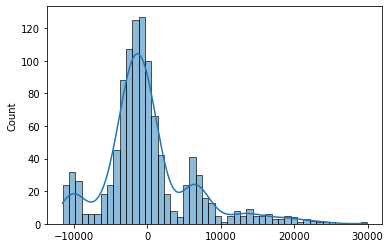

In [24]:
# Plot histogram of residuals
sns.histplot(residual, kde = True)

The error terms are not perfectly normally distributed but it have a similar shape. we can trnasform the data using the sqrt

In [25]:
# Log transformation on the target variable
train_target_sqrt = np.sqrt(train_target)

In [26]:
# Fitting new model with the transformed target variable
ols_model_4 = sm.OLS(train_target_sqrt, train_features_scaled_new2)

ols_res_4 = ols_model_4.fit()

In [27]:
# Residuals
residual = ols_res_4.resid 

In [28]:
residual.mean()

-7.211676738649241e-15

<AxesSubplot:ylabel='Count'>

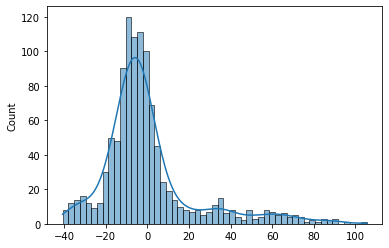

In [29]:
# Plot histogram of residuals
sns.histplot(residual, kde = True)

### **Linearity of Variables**

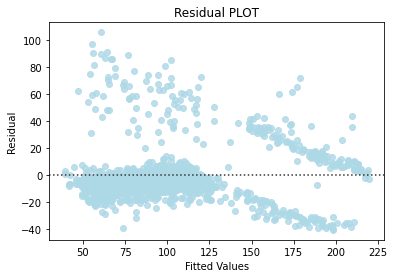

In [30]:
# Predicted values
fitted = ols_res_4.fittedvalues

sns.residplot(x = fitted, y = residual, color = "lightblue")

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations:**

- We can see that there is a sligth pattern in the residuals vs fitted values scatter plot but lets assume that the linearity assumption is satisfied.
- Let's check the model summary of the latest model we have fit.

In [31]:
print(ols_res_4.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     608.5
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:06:29   Log-Likelihood:                -4858.4
No. Observations:                1070   AIC:                             9731.
Df Residuals:                    1063   BIC:                             9766.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               41.6080      2.123  

- The model performance has improved. The R-Squared has increased from 0.749 to 0.775.

Let's check the final assumption of homoscedasticity.

### **No Heteroscedasticity**

In [32]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [33]:
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(train_target_sqrt, train_features_scaled_new2)

lzip(name, test)

[('F statistic', 0.9925705436306683), ('p-value', 0.5341220941968858)]

- As we observe from the above test, the p-value is greater than 0.05, that means the residuals are homoscedastic.

We have verified all the assumptions of the linear regression model. The final equation of the model is as follows:

**$\sqrt ($ charges $)$ $= 41.6080 + 64.3823 *$ age $ + 38.8107 *$ bmi $ + 16.8795 *$ children $ + 91.1751 *$ smoker_yes $ - 6.5480 *$ region_southeast $ - 4.9609 *$ region_southwest**

Let's make the final test predictions.

In [34]:
without_const = train_features_scaled.iloc[:, 1:]

test_features = pd.get_dummies(test_df, drop_first = True)

test_features = test_features[list(without_const)]

# Applying transform on the test data
test_features_scaled = scaler.transform(test_features)

test_features_scaled = pd.DataFrame(test_features_scaled, columns = without_const.columns)

test_features_scaled = sm.add_constant(test_features_scaled)

test_features_scaled = test_features_scaled.drop(["region_northwest",'sex_male'], axis = 1)

test_features_scaled.head()

,const,age,bmi,children,smoker_yes,region_southeast,region_southwest
0,1.0,0.630435,0.528294,0.2,0.0,0.0,1.0
1,1.0,0.478261,0.162192,0.4,0.0,0.0,0.0
2,1.0,0.760870,0.627427,0.2,0.0,1.0,0.0
3,1.0,0.565217,0.094176,0.2,1.0,0.0,0.0
4,1.0,0.717391,0.176098,0.2,1.0,1.0,0.0


## **Evaluation Metrics**

### **R-Squared**

In [35]:
print(ols_res_4.rsquared)

0.7745127449044681


### **Mean Squared Error**

In [36]:
print(ols_res_4.mse_resid)

517.9383792002893


### **Root Mean Squared Error**

In [37]:
print(np.sqrt(ols_res_4.mse_resid))

22.75825958196912


Let's check the cross-validation score to identify if the model that we have built is **underfitted**, **overfitted** or **just right fit** model.

In [38]:
# Fitting linear model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, train_features_scaled_new2, train_target_sqrt, cv = 10)

cv_Score12 = cross_val_score(linearregression, train_features_scaled_new2, train_target_sqrt, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std()*2))

print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std()*2))

RSquared: 0.764 (+/- 0.112)
Mean Squared Error: 521.997 (+/- 211.710)


**Observations:**

- The R-Squared on the cross-validation is 0.764 which is almost similar to the R-Squared on the training dataset.
- The MSE on cross-validation is 521.997 which is almost similar to the R-Squared on the training dataset.

It seems like that our model is **just right fit**. It is giving a generalized performance.

## **Predictions on the Test Dataset**

In [39]:
# These test predictions will be on a log scale
test_predictions = ols_res_4.predict(test_features_scaled)

# We are converting the log scale predictions to its original scale
test_predictions_inverse_transformed = test_predictions**2

test_predictions_inverse_transformed

0      10224.306614
1       7301.039955
2      12493.281527
3      31047.874069
4      33354.765522
           ...     
263    13717.637763
264    38896.249607
265     2536.008021
266    11804.582020
267    13396.033005
Length: 268, dtype: float64

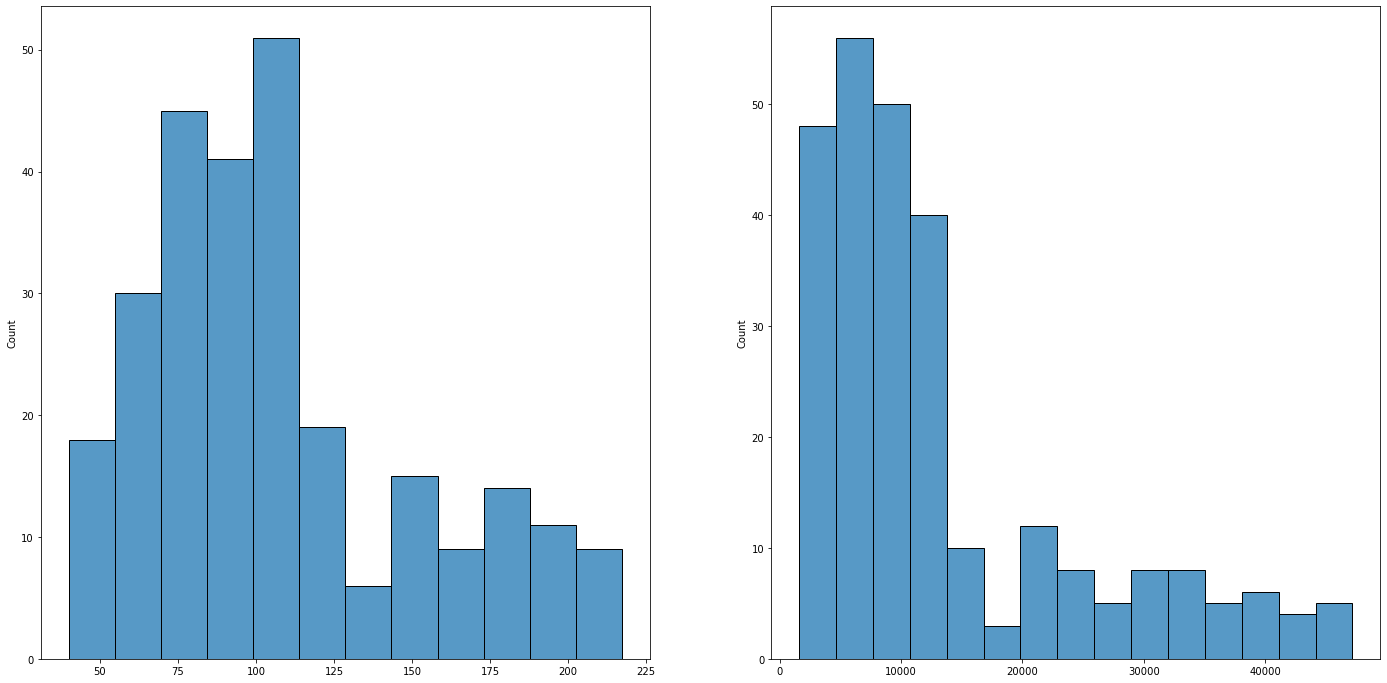

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (24, 12))

sns.histplot(test_predictions, ax = ax[0]);

sns.histplot(test_predictions_inverse_transformed, ax = ax[1]);

## **Conclusions and Recommendations**

- Performed EDA, univariate and bivariate analysis, on all the variables in the dataset.
- Started the model building process with all the features.
- Removed multicollinearity from the data and analyzed the model summary report to drop insignificant features.
- We checked for different assumptions of linear regression and fixed the model iteratively if any assumptions did not hold true.
- Finally, we evaluated the model using different evaluation metrics.

below is the model equation:

**$\sqrt ($ charges $)$ $= 41.6080 + 64.3823 *$ age $ + 38.8107 *$ bmi $ + 16.8795 *$ children $ + 91.1751 *$ smoker_yes $ - 6.5480 *$ region_southeast $ - 4.9609 *$ region_southwest**

After interpreting this linear regression equation, it is clear that smoking increase the charges of insurance. Also, a higher bmi tend to rise the value of the charges. So a recomendation over things we have some controla are: to mantein a healty bmi and dont smoke. The reggresion also sugest that the charges increases with age and children.